In [1]:
from MLFM_GCP.circuits.cp_fraction import cp_fraction
from MLFM_GCP.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from MLFM_GCP.partitioning.FM.FM_methods import set_initial_partitions
from qiskit.circuit.library import QFT, QuantumVolume
from MLFM_GCP.circuits.QAOA import QAOA_random
from MLFM_GCP.partitioning.FM.FM_main import *

num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5 )

# circuit = QFT(num_qubits, do_swaps=False)

# circuit = QuantumVolume(num_qubits, depth=10)

# circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

circuit = transpile(circuit, basis_gates = ['cp', 'u'])

depth = circuit.depth() + 2

graph = QuantumCircuitHyperGraph(circuit, group_gates=True)

assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)



                                            

In [ ]:
cost, assignment_list, cost_list = run_FM(graph, assignment, qpu_info, num_partitions, passes=100, limit= num_qubits*depth, active_nodes=graph.nodes, max_gain=4, stochastic=False, log=True)

cost_explore, assignment_list_explore, cost_list_explore = run_FM(graph, assignment, qpu_info, num_partitions, passes=100, limit= num_qubits*depth*0.125, active_nodes=graph.nodes, max_gain=4, stochastic=True, log=True)



Initial cost: 141
All passes complete.
Final cost: 112
Initial cost: 141
All passes complete.
Final cost: 103


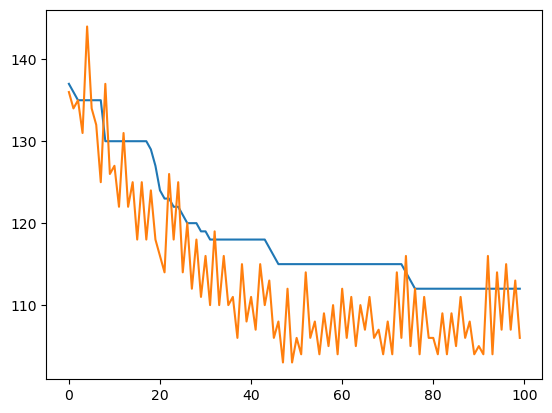

In [40]:
import matplotlib.pyplot as plt 

plt.plot(cost_list)
plt.plot(cost_list_explore)

with open('exploration.dat', 'w') as f:
    f.write("iter cost cost_expl\n")
    for i in range(len(cost_list)):
        f.write(f"{i} {cost_list[i]} {cost_list_explore[i]}\n")

In [ ]:
import time 
curtailment = [1 - i*0.05 for i in range(20)]



l = []
t = []

list_costs = []

iterations = 5

for c in curtailment:
    print("Curtailment: ", c)
    start = time.time()
    cost_total = 0
    for i in range(iterations):
        cost, assignment_list, cost_list = run_FM(hypergraph=graph, 
                                                        initial_assignment=assignment,
                                                        qpu_info=qpu_info,
                                                        num_partitions=num_partitions,
                                                        limit = num_qubits*depth*c,
                                                        max_gain=4,
                                                        passes=50,
                                                        active_nodes=graph.nodes,
                                                        stochastic=True,
                                                        log=True)
        cost_total += cost
        print(f'Cost for iteration {i}: {cost}')
    end = time.time()
    print("Average time: ", (end - start)/iterations)
    timer = (end - start)/iterations
    cost = cost_total/iterations 
    print("Average cost: ", cost)
    l.append(cost)
    t.append(timer)
    list_costs.append(cost_list)


    



Curtailment:  1.0
Initial cost: 145
All passes complete.
Final cost: 178
Cost for iteration 0: 178
Initial cost: 145
All passes complete.
Final cost: 165
Cost for iteration 1: 165
Initial cost: 145
All passes complete.
Final cost: 181
Cost for iteration 2: 181
Initial cost: 145
All passes complete.
Final cost: 170
Cost for iteration 3: 170
Initial cost: 145
All passes complete.
Final cost: 170
Cost for iteration 4: 170
Average time:  60.56844959259033
Average cost:  172.8
Curtailment:  0.95
Initial cost: 145
All passes complete.
Final cost: 179
Cost for iteration 0: 179
Initial cost: 145
All passes complete.
Final cost: 171
Cost for iteration 1: 171
Initial cost: 145
All passes complete.
Final cost: 178
Cost for iteration 2: 178
Initial cost: 145
All passes complete.
Final cost: 174
Cost for iteration 3: 174
Initial cost: 145
All passes complete.
Final cost: 184
Cost for iteration 4: 184
Average time:  61.35821986198425
Average cost:  177.2
Curtailment:  0.9
Initial cost: 145
All passe

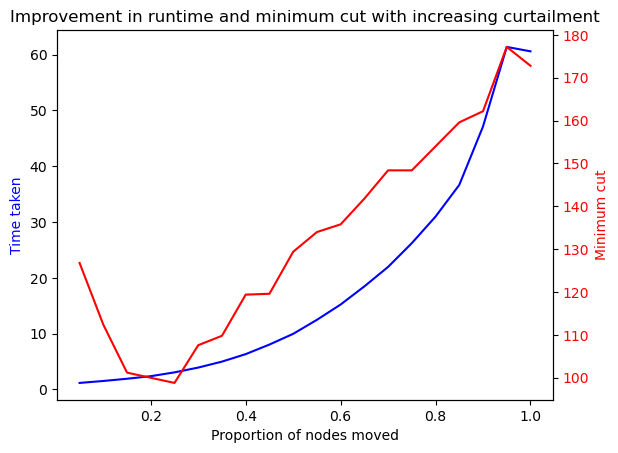

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = curtailment
y1 = t          # Data for left y-axis
y2 = l        # Data for right y-axis

fig, ax1 = plt.subplots()

# Plot y1 against x using the primary y-axis (on the left)
ax1.plot(x, y1, color="blue", label="Runtime")
ax1.set_xlabel("Proportion of nodes moved")
ax1.set_ylabel("Time taken", color="blue")

# Create a "twin" of the first Axes, i.e., share the same x-axis but have a new y-axis on the right
ax2 = ax1.twinx()
ax2.plot(x, y2, color="red", label="Minimum cut")
ax2.set_ylabel("Minimum cut", color="red")

# Optional: Make sure the second y-axis labels are in red
for tl in ax2.get_yticklabels():
    tl.set_color("red")

plt.title("Improvement in runtime and minimum cut with increasing curtailment")
plt.show()


with open("curtailment_2.dat", "w") as f:
    f.write(f"x y1 y2\n")
    for i in range(20):
        f.write(f"{x[i]} {y1[i]} {y2[i]}\n")


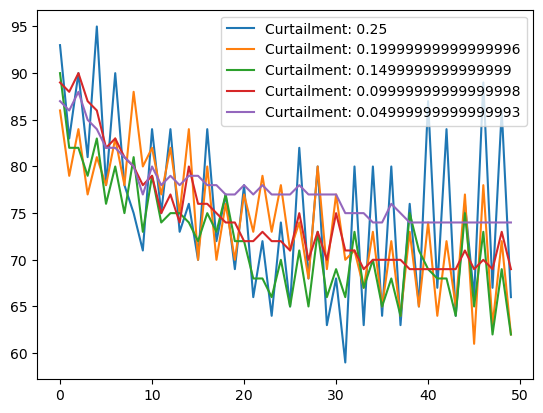

In [ ]:
indeces = [i for i in range(15,20)]


for i in indeces:
    plt.plot(list_costs[i], label = "Curtailment: " + str(curtailment[i]))
plt.legend()

In [ ]:
num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

iterations = 100 

cost_dist_exploit = []
cost_dist_explore = []

for i in range(iterations):
    circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5 )
    
    print(f"Iteration {i}")

    # circuit = QFT(num_qubits, do_swaps=False)

    # circuit = QuantumVolume(num_qubits, depth=10)

    # circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

    circuit = transpile(circuit, basis_gates = ['cp', 'u'])

    depth = circuit.depth() + 2

    graph = QuantumCircuitHyperGraph(circuit, group_gates=True)

    assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)


    cost_exploit, _, _= run_FM(hypergraph=graph, 
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=False,
                            log=True)
    
    cost_explore, _, _ = run_FM(hypergraph=graph,
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    
    
    cost_dist_exploit.append(cost_exploit)
    cost_dist_explore.append(cost_explore)




    

    
    

    



Iteration 0
Initial cost: 145
All passes complete.
Final cost: 119
Initial cost: 145
All passes complete.
Final cost: 119
Iteration 1
Initial cost: 146
All passes complete.
Final cost: 116
Initial cost: 146
All passes complete.
Final cost: 110
Iteration 2
Initial cost: 147
All passes complete.
Final cost: 119
Initial cost: 147
All passes complete.
Final cost: 117
Iteration 3
Initial cost: 152
All passes complete.
Final cost: 107
Initial cost: 152
All passes complete.
Final cost: 103
Iteration 4
Initial cost: 154
All passes complete.
Final cost: 123
Initial cost: 154
All passes complete.
Final cost: 117
Iteration 5
Initial cost: 147
All passes complete.
Final cost: 109
Initial cost: 147
All passes complete.
Final cost: 116
Iteration 6
Initial cost: 150
All passes complete.
Final cost: 111
Initial cost: 150
All passes complete.
Final cost: 105
Iteration 7
Initial cost: 152
All passes complete.
Final cost: 116
Initial cost: 152
All passes complete.
Final cost: 111
Iteration 8
Initial cost

NameError: name 'plt' is not defined

(array([ 5., 11., 16., 11., 15., 15.,  8.,  8.,  8.,  3.]),
 array([100. , 102.4, 104.8, 107.2, 109.6, 112. , 114.4, 116.8, 119.2,
        121.6, 124. ]),
 <BarContainer object of 10 artists>)

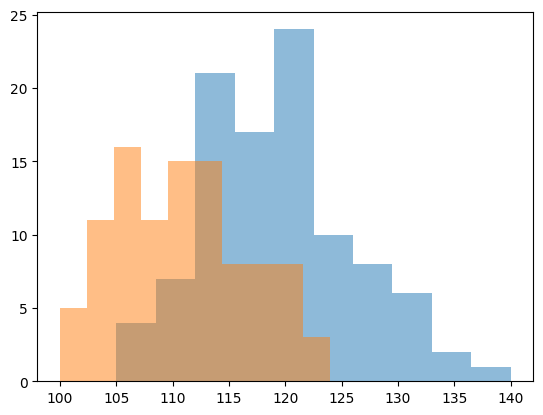

In [5]:
import matplotlib.pyplot as plt


plt.hist(cost_dist_exploit, bins = 10, alpha = 0.5, label = "Exploit")
plt.hist(cost_dist_explore, bins = 10, alpha = 0.5, label = "Explore")
    


In [6]:
data = {"num_qubits": num_qubits, "fraction": 0.5, "num_partitions": num_partitions, "exploit": cost_dist_exploit, "explore": cost_dist_explore}

import json
with open("data_explore_histogram.json", "w") as f:
    json.dump(data, f)

In [10]:
num_qubits = 32
num_partitions = 2
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

iterations = 100 

cost_dist_no_groups = []
cost_dist_groups = []

for i in range(iterations):
    circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5 )
    
    print(f"Iteration {i}")

    # circuit = QFT(num_qubits, do_swaps=False)

    # circuit = QuantumVolume(num_qubits, depth=10)

    # circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

    circuit = transpile(circuit, basis_gates = ['cp', 'u'])

    depth = circuit.depth() + 2

    graph = QuantumCircuitHyperGraph(circuit, group_gates=False)

    assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)


    cost_no_groups, _, _= run_FM(hypergraph=graph, 
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    graph = QuantumCircuitHyperGraph(circuit, group_gates=True)
    
    cost_groups, _, _ = run_FM(hypergraph=graph,
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    cost_dist_no_groups.append(cost_no_groups)    
    cost_dist_groups.append(cost_groups)



    

    
    

    



Iteration 0
Initial cost: 135
All passes complete.
Final cost: 72
Initial cost: 84
All passes complete.
Final cost: 55
Iteration 1
Initial cost: 135
All passes complete.
Final cost: 79
Initial cost: 87
All passes complete.
Final cost: 58
Iteration 2
Initial cost: 126
All passes complete.
Final cost: 73
Initial cost: 85
All passes complete.
Final cost: 48
Iteration 3
Initial cost: 136
All passes complete.
Final cost: 70
Initial cost: 77
All passes complete.
Final cost: 52
Iteration 4
Initial cost: 124
All passes complete.
Final cost: 74
Initial cost: 80
All passes complete.
Final cost: 54
Iteration 5
Initial cost: 137
All passes complete.
Final cost: 85
Initial cost: 80
All passes complete.
Final cost: 58
Iteration 6
Initial cost: 134
All passes complete.
Final cost: 77
Initial cost: 86
All passes complete.
Final cost: 57
Iteration 7
Initial cost: 143
All passes complete.
Final cost: 83
Initial cost: 94
All passes complete.
Final cost: 58
Iteration 8
Initial cost: 132
All passes complet

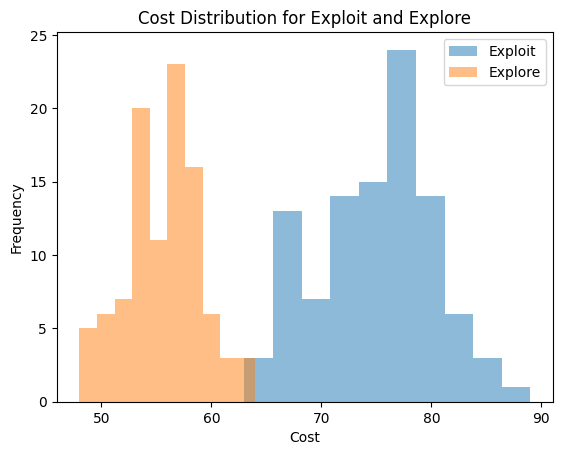

In [11]:
import matplotlib.pyplot as plt


plt.hist(cost_dist_no_groups, bins=10, alpha=0.5, label="Exploit")
plt.hist(cost_dist_groups, bins=10, alpha=0.5, label="Explore")
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Cost Distribution for Exploit and Explore')
plt.legend()
plt.show()
    


In [16]:
num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

iterations = 100 

fractions = [0.3, 0.5, 0.7, 0.9]

for fraction in fractions:
        

    cost_dist_no_groups = []
    cost_dist_groups = []

    for i in range(iterations):
        circuit = cp_fraction(  num_qubits=num_qubits,
                            depth=num_qubits,
                            fraction= fraction )
        
        print(f"Iteration {i}")

        # circuit = QFT(num_qubits, do_swaps=False)

        # circuit = QuantumVolume(num_qubits, depth=10)

        # circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

        circuit = transpile(circuit, basis_gates = ['cp', 'u'])

        depth = circuit.depth() + 2

        graph = QuantumCircuitHyperGraph(circuit, group_gates=False)

        assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)


        cost_no_groups, _, _= run_FM(hypergraph=graph, 
                                initial_assignment=assignment,
                                qpu_info=qpu_info,
                                num_partitions=num_partitions,
                                limit = num_qubits*depth*0.125,
                                max_gain=4,
                                passes=50,
                                active_nodes=graph.nodes,
                                stochastic=True,
                                log=True)
        
        graph = QuantumCircuitHyperGraph(circuit, group_gates=True)
        
        cost_groups, _, _ = run_FM(hypergraph=graph,
                                initial_assignment=assignment,
                                qpu_info=qpu_info,
                                num_partitions=num_partitions,
                                limit = num_qubits*depth*0.125,
                                max_gain=4,
                                passes=50,
                                active_nodes=graph.nodes,
                                stochastic=True,
                                log=True)
        
        cost_dist_no_groups.append(cost_no_groups)    
        cost_dist_groups.append(cost_groups)
    
    data = {"num_qubits": num_qubits, "fraction": fraction, "num_partitions": num_partitions, "no_groups": cost_dist_no_groups, "groups": cost_dist_groups}

    with open(f"data_groups_vs_histogram_{fraction}.json", "w") as f:
        json.dump(data, f)


    

    
    

    



Iteration 0
Initial cost: 120
All passes complete.
Final cost: 88
Initial cost: 103
All passes complete.
Final cost: 78
Iteration 1
Initial cost: 105
All passes complete.
Final cost: 68
Initial cost: 94
All passes complete.
Final cost: 65
Iteration 2
Initial cost: 113
All passes complete.
Final cost: 83
Initial cost: 93
All passes complete.
Final cost: 69
Iteration 3
Initial cost: 104
All passes complete.
Final cost: 77
Initial cost: 93
All passes complete.
Final cost: 70
Iteration 4
Initial cost: 99
All passes complete.
Final cost: 70
Initial cost: 92
All passes complete.
Final cost: 66
Iteration 5
Initial cost: 106
All passes complete.
Final cost: 70
Initial cost: 96
All passes complete.
Final cost: 68
Iteration 6
Initial cost: 132
All passes complete.
Final cost: 80
Initial cost: 111
All passes complete.
Final cost: 73
Iteration 7
Initial cost: 117
All passes complete.
Final cost: 78
Initial cost: 108
All passes complete.
Final cost: 66
Iteration 8
Initial cost: 103
All passes compl

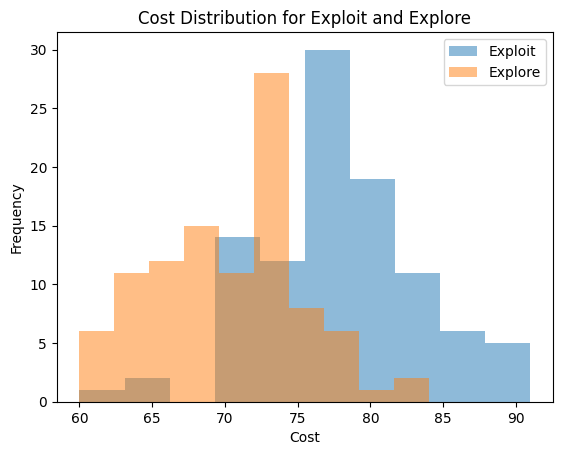

In [13]:
import matplotlib.pyplot as plt


plt.hist(cost_dist_no_groups, bins=10, alpha=0.5, label="Exploit")
plt.hist(cost_dist_groups, bins=10, alpha=0.5, label="Explore")
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Cost Distribution for Exploit and Explore')
plt.legend()
plt.show()
    


In [14]:
num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

iterations = 100 

cost_dist_no_groups = []
cost_dist_groups = []

for i in range(iterations):
    circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5 )
    
    print(f"Iteration {i}")

    # circuit = QFT(num_qubits, do_swaps=False)

    # circuit = QuantumVolume(num_qubits, depth=10)

    # circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

    circuit = transpile(circuit, basis_gates = ['cp', 'u'])

    depth = circuit.depth() + 2

    graph = QuantumCircuitHyperGraph(circuit, group_gates=False)

    assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)


    cost_no_groups, _, _= run_FM(hypergraph=graph, 
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    graph = QuantumCircuitHyperGraph(circuit, group_gates=True)
    
    cost_groups, _, _ = run_FM(hypergraph=graph,
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    cost_dist_no_groups.append(cost_no_groups)    
    cost_dist_groups.append(cost_groups)




Iteration 0
Initial cost: 193
All passes complete.
Final cost: 142
Initial cost: 157
All passes complete.
Final cost: 120
Iteration 1
Initial cost: 190
All passes complete.
Final cost: 132
Initial cost: 154
All passes complete.
Final cost: 108
Iteration 2
Initial cost: 203
All passes complete.
Final cost: 133
Initial cost: 153
All passes complete.
Final cost: 114
Iteration 3
Initial cost: 170
All passes complete.
Final cost: 130
Initial cost: 142
All passes complete.
Final cost: 105
Iteration 4
Initial cost: 188
All passes complete.
Final cost: 123
Initial cost: 147
All passes complete.
Final cost: 111
Iteration 5
Initial cost: 194
All passes complete.
Final cost: 134
Initial cost: 149
All passes complete.
Final cost: 107
Iteration 6
Initial cost: 190
All passes complete.
Final cost: 132
Initial cost: 145
All passes complete.
Final cost: 116
Iteration 7
Initial cost: 193
All passes complete.
Final cost: 123
Initial cost: 154
All passes complete.
Final cost: 109
Iteration 8
Initial cost

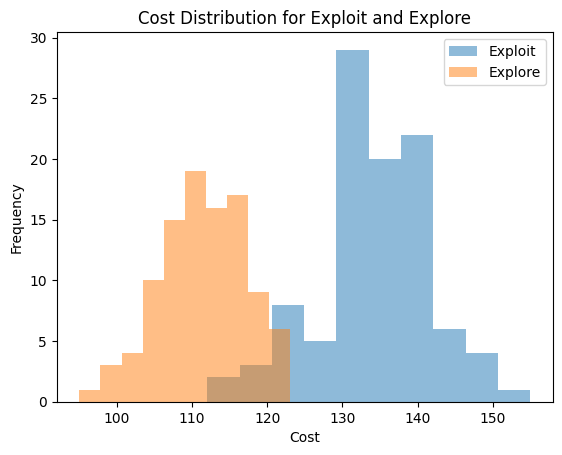

In [15]:
import matplotlib.pyplot as plt


plt.hist(cost_dist_no_groups, bins=10, alpha=0.5, label="Exploit")
plt.hist(cost_dist_groups, bins=10, alpha=0.5, label="Explore")
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Cost Distribution for Exploit and Explore')
plt.legend()
plt.show()
    


In [ ]:
num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

iterations = 100 

cost_dist_no_groups = []
cost_dist_groups = []

for i in range(iterations):
    circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.7 )
    
    print(f"Iteration {i}")

    # circuit = QFT(num_qubits, do_swaps=False)

    # circuit = QuantumVolume(num_qubits, depth=10)

    # circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

    circuit = transpile(circuit, basis_gates = ['cp', 'u'])

    depth = circuit.depth() + 2

    graph = QuantumCircuitHyperGraph(circuit, group_gates=False)

    assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)


    cost_no_groups, _, _= run_FM(hypergraph=graph, 
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    graph = QuantumCircuitHyperGraph(circuit, group_gates=True)
    
    cost_groups, _, _ = run_FM(hypergraph=graph,
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    cost_dist_no_groups.append(cost_no_groups)    
    cost_dist_groups.append(cost_groups)



    

    
    

    



In [ ]:
num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

iterations = 100 

cost_dist_no_groups = []
cost_dist_groups = []

for i in range(iterations):
    circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.9 )
    
    print(f"Iteration {i}")

    # circuit = QFT(num_qubits, do_swaps=False)

    # circuit = QuantumVolume(num_qubits, depth=10)

    # circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

    circuit = transpile(circuit, basis_gates = ['cp', 'u'])

    depth = circuit.depth() + 2

    graph = QuantumCircuitHyperGraph(circuit, group_gates=False)

    assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)


    cost_no_groups, _, _= run_FM(hypergraph=graph, 
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    graph = QuantumCircuitHyperGraph(circuit, group_gates=True)
    
    cost_groups, _, _ = run_FM(hypergraph=graph,
                            initial_assignment=assignment,
                            qpu_info=qpu_info,
                            num_partitions=num_partitions,
                            limit = num_qubits*depth*0.125,
                            max_gain=4,
                            passes=50,
                            active_nodes=graph.nodes,
                            stochastic=True,
                            log=True)
    
    cost_dist_no_groups.append(cost_no_groups)    
    cost_dist_groups.append(cost_groups)



    

    
    

    



In [20]:
for fraction in fractions:
    with open(f"data_groups_vs_histogram_{fraction}.json", "r") as f:
        data = json.load(f)
    
    cost_dist_no_groups = data["no_groups"]
    cost_dist_groups = data["groups"]

    with open(f"data_no_groups_hist_{fraction}.dat", "w") as f1:
        with open(f"data_groups_hist_{fraction}.dat", "a") as f2:
            for i in range(len(cost_dist_no_groups)):
                f1.write(f"{cost_dist_no_groups[i]}\n")
                f2.write(f"{cost_dist_groups[i]}\n")